# Postwork 8: Clasificación No Supervisada y Supervisada

## Regresión logística


Para este postwork trabajaremos con un dataset de ataques al corazón.
Aquí una descripción de las columnas:

* age: Edad
* sex: Sexo (1 hombre, 0 mujer)
* cp: Dolor en el pecho: 1: typical angina (all criteria present), 2: atypical angina (two of three criteria satisfied) -- 3: non-anginal pain (less than one criteria satisfied) -- 4: asymptomatic (none of the criteria are satisfied)
* trestbps: Presión sanguínea en reposo (en mmHg)
* chol: Colesterol en mg/dL
* fbs: si glucosa en la sangre en ayunas > 120 mg/dL (Tiende a ser diabético) 1 = verdadero; 0 = falso.
* restecg:  Resultados de electrocardiograma en reposo: -- Valor 0: normal -- Valor 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Valor 2: showing probable or definite left ventricular hypertrophy by Estes' criteria.
* thalach: FC máxima. Mayor número de latidos por minuto que tu corazón puede alcanzar durante el ejercicio.
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest (in mm, achieved by subtracting the lowest ST segment points during exercise and rest)
* slope: the slope of the peak exercise ST segment, ST-T abnormalities are considered to be a crucial indicator for identifying presence of ischaemia -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping.
* ca: number of major vessels (0-3) colored by fluoroscopy.
* thal: AHD: 0 = normal; 1 = fixed defect (heart tissue can't absorb thallium both under stress and in rest); 2 = reversible defect (heart tissue is unable to absorb thallium only under the exercise portion of the test)
* target: .AHD: 0 = no disease, 1 = disease



In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/Heart Attack Data Set.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Veamos si nuestros datos están limpios.

In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Vamos a intentar entrenar un modelo de Regresión Logística para clasificar si hay enfermedad o no.

In [5]:
X = df.drop(columns=['target'])
y = df['target']

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
logreg = LogisticRegression(max_iter=10000)

In [28]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Ya que tenemos un modelo, podemos hacer predicciones utilizando el dataset de prueba:

In [29]:
y_pred = logreg.predict(X_test)

y_pred

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1])

Veamos que tan exacto es el modelo.

In [30]:
logreg.score(X_test, y_test)

0.819672131147541

## Evaluación del modelo

### Matriz de confusión

Recordemos que la matriz de confusión es una matriz de 2x2, donde el eje x representa los resultados estimados por el modelo y el eje y representa los resultados verdaderos. Lo que se busca es que la cantidad de Verdaderos Positivos y Verdaderos Negativos sea lo mayor posible.

In [31]:
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [32]:
from sklearn import metrics

In [33]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[21, 10],
       [ 1, 29]])

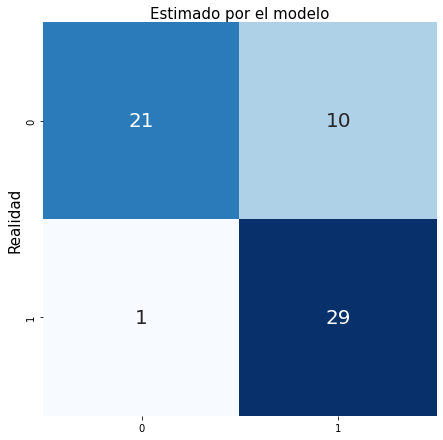

In [34]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

Ahora que tenemos nuestra matriz de confusión, calculemos 4 medidas de evaluación: Precisión, Exactitud, Sensibilidad y Especificidad. Cada una mide un aspecto de nuestro modelo:

1. Precisión: De todas las clasificaciones positivas que hicimos, ¿cuántas de ésas eran en realidad positivas?

`precision = VP / (VP + FP)`

2. Exactitud: Del total de clasificaciones que hicimos, ¿cuántas fueron clasificadas correctamente?

`exactitud = (VP + VN) / (VP + FN + FP + VN)`

3. Sensibilidad: De todas las clasificaciones positivas que había en realidad, ¿cuántas fueron clasificadas correctamente como positivas?

`sensibilidad = VP / (VP + FN)`

4. Especificidad: De todas las clasificaciones negativas que había en realidad, ¿cuántas fueron clasificadas correctamente como negativas?

`especificidad = VN / (VN + FP)`

Todas estas medidas pueden tener valores entre 0 y 1. Entre más cerca del 1 estén, mejor es nuestro modelo. En nuestro ejemplo, éstas son las medidas que obtuvimos:

In [37]:
tn, fp, fn, tp = cnf_matrix.ravel()

print("Precision:",metrics.precision_score(y_test, y_pred))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
print("Sensibilidad:",metrics.recall_score(y_test, y_pred))
print("Especificidad:", tn / (tn + fp))

Precision: 0.7435897435897436
Exactitud: 0.819672131147541
Sensibilidad: 0.9666666666666667
Especificidad: 0.6774193548387096


Vemos que la sensibilidad es muy alta. Esto quiere decir, que si en verdad tienes la enfermedad, es altamente probable que se haga una predicción correcta. En cambio la especificidad es algo baja, por lo que si en realidad tu resultado era negativo, es un poco más probable lo calcule de manera errónea.

### Curva ROC / AUC

Recordemos que en la curva ROC/AUC, el eje `y` representa la proporción de Verdaderos Positivos, que es lo mismo que la Sensibilidad.

El eje `x` representa la proporción de Falsos Positivos. Esto quiere decir: de todas las clasificaciones negativas que había en realidad, cuántas fueron clasificadas como positivas por nuestro modelo. Para obtener este valor, restamos el valor de Especificidad a 1 (`1 - especificidad`).

La curva ROC grafica el cambio en la proporción de Verdaderos Positivos contra la proporción de Falsos Positivos a través de diferentes umbrales.

La AUC (Area Under The Curve), o área debajo de la curva, es toda el área que se encuentra por debajo de la curva ROC. Podemos tener un valor entre 0 y 1.

Un valor de AUC cercano a 1, significa que nuestro modelo es muy bueno para diferenciar entre positivos y negativos. Además, es muy probable que elija el valor correcto. Un valor cercano a 0 significa que nuestro modelo es muy bueno para diferenciar entre positivos y negativos pero elige casi siempre el valor contrario al real. O sea, elige positivos cuando debería de elegir negativos, y viceversa.

Un valor de AUC cercano al 0.5 significa que nuestro modelo no puede diferenciar entre positivos y negativos.

In [38]:
from sklearn.metrics import roc_curve, auc

Para graficar una curva ROC / AUC necesitamos resultados probabilísticos:

In [40]:
y_pred_proba = logreg.predict_proba(X_test)

y_pred_proba[:10,:]

array([[0.29734846, 0.70265154],
       [0.02292802, 0.97707198],
       [0.15304996, 0.84695004],
       [0.95394819, 0.04605181],
       [0.24929458, 0.75070542],
       [0.14060539, 0.85939461],
       [0.78663668, 0.21336332],
       [0.83173797, 0.16826203],
       [0.04734415, 0.95265585],
       [0.35951642, 0.64048358]])

En esta matriz, cada vector tiene dos valores. El primer valor es la probabilidad de que el valor sea negativo. El segundo valor es la probabilidad de que el valor sea positivo. Necesitamos los resultados de esta manera para poder modificar el umbral y obtener los puntos necesarios para generar la curva ROC.

In [41]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

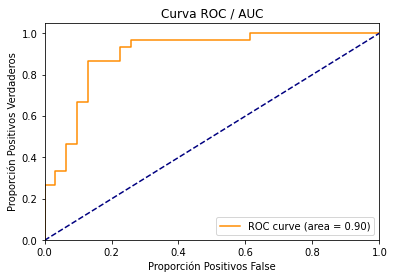

In [42]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción Positivos False')
plt.ylabel('Proporción Positivos Verdaderos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()

Nuestro valor AUC es cercano al 1 (0.90). Esto significa que nuestro modelo puede diferenciar bastante bien entre negativos y positivos, y entonces es probable que elija la clasificación correcta.